In [ ]:
# Note: restart runtime after this import before running the augmentations
!pip install -U augly[image]
!sudo apt-get install python3-magic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-magic is already the newest version (2:0.4.24-2).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


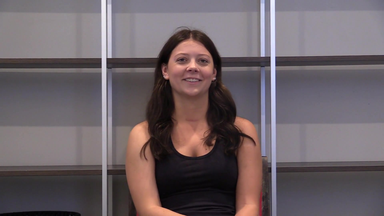

In [ ]:
import os
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display

# Get input image, scale it down to avoid taking up the whole screen
input_img_path = os.path.join(
    utils.TEST_URI, "image", "inputs", "dfdc_1.jpg"
)

# We can use the AugLy scale augmentation
input_img = imaugs.scale('https://raw.githubusercontent.com/facebookresearch/AugLy/main/augly/tests/assets/image/inputs/dfdc_1.jpg', factor=0.2)
display(input_img)

#Perform rotation with 90 degrees

In [ ]:
"""
You can also pass in bounding boxes, which will be transformed along with
the image & included in the metadata (note: you must provide metadata to
get the transformed bboxes)
"""
meta = []
bboxes_original = [(20, 6, 250, 180)]

rotated_img = imaugs.rotate(
        input_img,
        degrees=90,
        metadata=meta,
        bboxes=bboxes_original,
        bbox_format="pascal_voc",
    )

meta

[{'name': 'rotate',
  'src_width': 384,
  'src_height': 216,
  'dst_width': 216,
  'dst_height': 384,
  'output_path': None,
  'degrees': 90,
  'bbox_format': 'pascal_voc',
  'src_bboxes': [(20, 6, 250, 180)],
  'dst_bboxes': [(36.00000000000001, 134.0, 210.00000000000003, 364.0)],
  'intensity': 50.0}]

# Get the original img and rotated bbox

In [ ]:
original_img = input_img.copy()
rotated_bbox = meta[0]['dst_bboxes'][0]

#Visualize the original img with original bbox

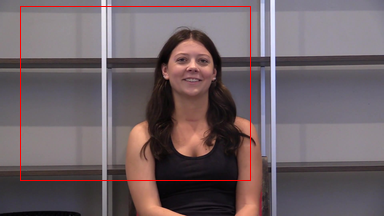

In [ ]:
from PIL import Image, ImageDraw
# Draw the bounding box on the original image
draw = ImageDraw.Draw(original_img)
bboxes_original = [(20, 6, 250, 180)]
draw.rectangle(bboxes_original[0], outline="red")
original_img.show()

# Visualize the rotated image with rotated bbox

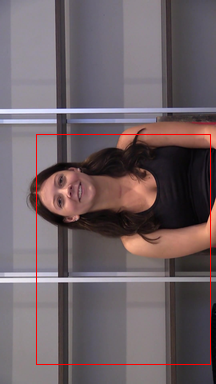

In [ ]:
from PIL import Image, ImageDraw
# Draw the bounding box on the rotated image
rotated_img_1 = rotated_img.copy()
draw = ImageDraw.Draw(rotated_img_1)
draw.rectangle(rotated_bbox, outline="red")
rotated_img_1.show()

## Visualize the **expected** roatated image with roataed bbox

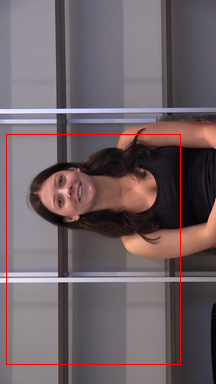

In [ ]:
from PIL import Image, ImageDraw
# Draw the bounding box on the rotated image
rotated_img_2 = rotated_img.copy()
draw = ImageDraw.Draw(rotated_img_2)
draw.rectangle((6, 364, 180, 134), outline="red") # The rotated bbox should be this?
rotated_img_2.show()

At first I thought the bug might be the different coordinates when visulizing the bbox. \\
But I did another experiment: whether we can get the original bbox when with reverse-rotation operation. Currently it seems can **not** get the original bbox when I applied **90 degree rotation** and then **-90 degree rotation**

# Reverse rotation

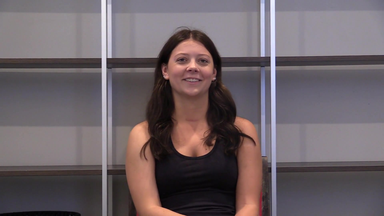

In [ ]:
input_img

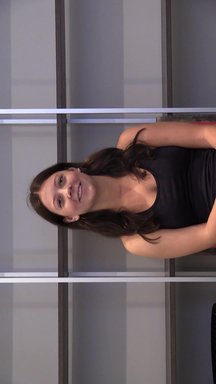

[{'name': 'rotate',
  'src_width': 384,
  'src_height': 216,
  'dst_width': 216,
  'dst_height': 384,
  'output_path': None,
  'degrees': 90,
  'bbox_format': 'pascal_voc',
  'src_bboxes': [(20, 6, 250, 180)],
  'dst_bboxes': [(36.00000000000001, 134.0, 210.00000000000003, 364.0)],
  'intensity': 50.0}]

In [ ]:
"""
You can also pass in bounding boxes, which will be transformed along with
the image & included in the metadata (note: you must provide metadata to
get the transformed bboxes)
"""
meta = []
original_bboxes = [(20, 6, 250, 180)]

rotated_img = imaugs.rotate(
        input_img,
        degrees=90,
        metadata=meta,
        bboxes=original_bboxes,
        bbox_format="pascal_voc",
    )
display(rotated_img)
rotated_bboxes = [meta[0]['dst_bboxes'][0]]
meta

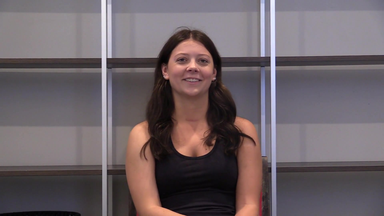

[{'name': 'rotate',
  'src_width': 216,
  'src_height': 384,
  'dst_width': 384,
  'dst_height': 216,
  'output_path': None,
  'degrees': -90,
  'bbox_format': 'pascal_voc',
  'src_bboxes': [(36.00000000000001, 134.0, 210.00000000000003, 364.0)],
  'dst_bboxes': [(134.0, 36.00000000000001, 364.0, 210.00000000000003)],
  'intensity': 50.0}]

In [ ]:
"""
You can also pass in bounding boxes, which will be transformed along with
the image & included in the metadata (note: you must provide metadata to
get the transformed bboxes)
"""
meta = []

reversed_img = imaugs.rotate(
        rotated_img,
        degrees= - 90,
        metadata=meta,
        bboxes=rotated_bboxes,
        bbox_format="pascal_voc",
    )
reversed_bboxes = [meta[0]['dst_bboxes'][0]]
display(reversed_img)
meta

In [ ]:
print(original_bboxes)
print(reversed_bboxes)

[(20, 6, 250, 180)]
[(134.0, 36.00000000000001, 364.0, 210.00000000000003)]
